In [1]:
import pandas as pd 
import numpy as np 
from path import Path

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/namirsacic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/namirsacic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
def csv_to_df(csv_file):
    file_path = Path(csv_file)
    df = pd.read_csv(file_path)
    
    return df

In [3]:
def extract_columns(df):
    df_for_sent_analysis = df[["created_at", "tweet"]].copy()
    
    return df_for_sent_analysis

In [4]:
#Get Polarity of Tweets
sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)

def sentiment_analysis(df):
    sentiment_scores = df.tweet.apply(ps)
    
    return sentiment_scores

In [5]:
#Join polarity results with dataframe
def join_data(sentiment_scores, df):
    sentiment_df = pd.DataFrame(data = list(sentiment_scores))
    data = df.join(sentiment_df.compound)
    
    return data

In [6]:
def create_csv(df, csv_name):
    df.to_csv(csv_name, encoding='utf-8', index=False)

In [8]:
twr_df = csv_to_df("/Users/namirsacic/tokenized-assets/sentiment_analysis/twr_cleaned.csv")

In [13]:
twr_df

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,1066015842360537088,2019-10-28 23:46:02+00:00,,1188965177112309762,en,0,0,0,8,Twitter for iPad,rt twrailway first found twr item walmart
1,1165073171634110471,2019-10-28 23:04:59+00:00,,1188954845849542656,en,0,0,0,0,Twitter Web App,crovansgate55 wish train shows guy sold ton tw...
2,15857701,2019-10-28 23:00:02+00:00,,1188953601172881408,en,0,0,0,0,LinkedIn,starting april 2020 capaccredited medical labo...
3,4842612891,2019-10-28 22:30:00+00:00,,1188946040080216064,en,0,0,0,0,LinkedIn,pharmacy leaders look new ways control costs a...
4,2753386612,2019-10-28 22:15:51+00:00,,1188942482459054082,en,2,0,1,0,Twitter Web App,domitwr copypasta
...,...,...,...,...,...,...,...,...,...,...,...
97459,2833374464,2022-10-27 00:18:43+00:00,,1585425725066207232,en,0,0,0,1,Twitter for iPhone,rt maceclassldsb 11 quick conferences today in...
97460,1163084926628925442,2022-10-27 00:18:27+00:00,,1585425659295576069,en,6,0,0,1,Twitter for iPhone,11 quick conferences today incl skill building...
97461,2886909582,2022-10-27 00:16:24+00:00,,1585425140900573184,en,3,2,0,0,Twitter for iPhone,mandy rose currently slated number one contend...
97462,1552115580702171136,2022-10-27 00:13:02+00:00,,1585424293806018561,en,0,0,0,0,Twitter Web App,fb love work aapl amd mnta gld twr spy best tr...


In [9]:
twr_sent_df = extract_columns(twr_df)

In [14]:
twr_sent_df

,created_at,tweet
0,2019-10-28 23:46:02+00:00,rt twrailway first found twr item walmart
1,2019-10-28 23:04:59+00:00,crovansgate55 wish train shows guy sold ton tw...
2,2019-10-28 23:00:02+00:00,starting april 2020 capaccredited medical labo...
3,2019-10-28 22:30:00+00:00,pharmacy leaders look new ways control costs a...
4,2019-10-28 22:15:51+00:00,domitwr copypasta
...,...,...
97459,2022-10-27 00:18:43+00:00,rt maceclassldsb 11 quick conferences today in...
97460,2022-10-27 00:18:27+00:00,11 quick conferences today incl skill building...
97461,2022-10-27 00:16:24+00:00,mandy rose currently slated number one contend...
97462,2022-10-27 00:13:02+00:00,fb love work aapl amd mnta gld twr spy best tr...


In [10]:
sentiment_score_twr = sentiment_analysis(twr_sent_df)

In [15]:
sentiment_score_twr

0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...
2        {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
97459    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
97460    {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...
97461    {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
97462    {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...
97463    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: tweet, Length: 97464, dtype: object

In [11]:
twr_sent_results = join_data(sentiment_score_twr, twr_sent_df)

In [16]:
twr_sent_results

,created_at,tweet,compound
0,2019-10-28 23:46:02+00:00,rt twrailway first found twr item walmart,0.0000
1,2019-10-28 23:04:59+00:00,crovansgate55 wish train shows guy sold ton tw...,0.4019
2,2019-10-28 23:00:02+00:00,starting april 2020 capaccredited medical labo...,0.3400
3,2019-10-28 22:30:00+00:00,pharmacy leaders look new ways control costs a...,0.0000
4,2019-10-28 22:15:51+00:00,domitwr copypasta,0.0000
...,...,...,...
97459,2022-10-27 00:18:43+00:00,rt maceclassldsb 11 quick conferences today in...,0.0000
97460,2022-10-27 00:18:27+00:00,11 quick conferences today incl skill building...,0.5423
97461,2022-10-27 00:16:24+00:00,mandy rose currently slated number one contend...,0.5719
97462,2022-10-27 00:13:02+00:00,fb love work aapl amd mnta gld twr spy best tr...,0.9287


In [12]:
create_csv(twr_sent_results, "twr_sent_results.csv")

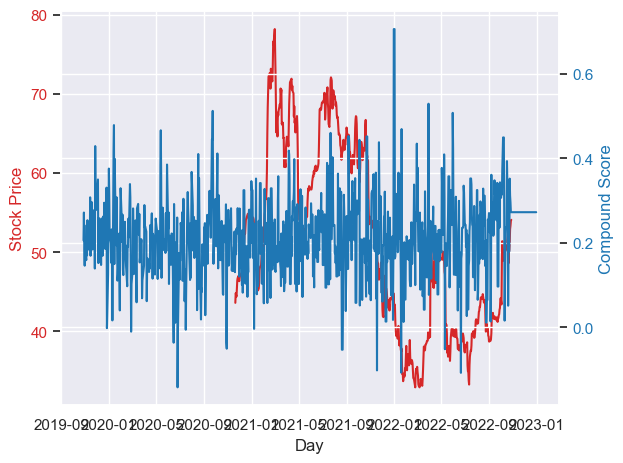

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = twr_sent_results

# convert created_at to datetime and extract day only
df1['day'] = pd.to_datetime(df1['created_at']).dt.date

# group by day and calculate mean compound score
df1_daily = df1.groupby('day')['compound'].mean().reset_index()

# create a daily range of dates
date_range = pd.date_range(start='2020-11-10', end='2022-12-31', freq='D').date

# merge with date range to fill in missing days
df1_daily = pd.merge(df1_daily, pd.DataFrame({'day': date_range}), on='day', how='outer')

# sort by day
df1_daily = df1_daily.sort_values(by='day')

# fill missing compound values
df1_daily['compound'] = df1_daily['compound'].fillna(method='ffill').fillna(method='bfill').interpolate()

# read in second dataframe
df2 = pd.read_csv('/Users/namirsacic/tokenized-assets/data_analysis/processed_data/daily_merged_data/TWTR_daily_merged.csv')

# convert day to datetime
df2['day'] = pd.to_datetime(df2['day']).dt.date

# merge dataframes on day
df = pd.merge(df2, df1_daily, on='day', how='left')

# plot
fig, ax1 = plt.subplots()

# plot stock price
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(df['day'], df['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# plot compound score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Compound Score', color=color)
ax2.plot(df1_daily['day'], df1_daily['compound'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


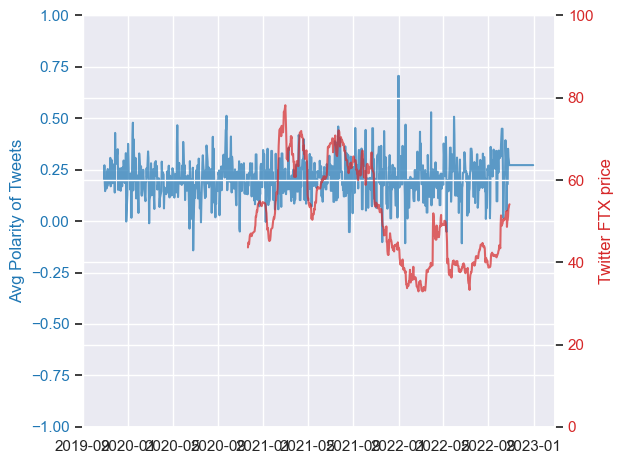

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = twr_sent_results

# convert created_at to datetime and extract day only
df1['day'] = pd.to_datetime(df1['created_at']).dt.date

# group by day and calculate mean compound score
df1_daily = df1.groupby('day')['compound'].mean().reset_index()

# create a daily range of dates
date_range = pd.date_range(start='2020-11-10', end='2022-12-31', freq='D').date

# merge with date range to fill in missing days
df1_daily = pd.merge(df1_daily, pd.DataFrame({'day': date_range}), on='day', how='outer')

# sort by day
df1_daily = df1_daily.sort_values(by='day')

# fill missing compound values
df1_daily['compound'] = df1_daily['compound'].fillna(method='ffill').fillna(method='bfill').interpolate()

# read in second dataframe
df2 = pd.read_csv('/Users/namirsacic/tokenized-assets/data_analysis/processed_data/daily_merged_data/TWTR_daily_merged.csv')

# convert day to datetime
df2['day'] = pd.to_datetime(df2['day']).dt.date

# merge dataframes on day
df = pd.merge(df2, df1_daily, on='day', how='left')

# plot
fig, ax = plt.subplots()

# plot compound score
color = 'tab:blue'
ax.set_ylabel('Avg Polarity of Tweets', color=color)
ax.plot(df1_daily['day'], df1_daily['compound'], color=color, alpha=0.7)
ax.tick_params(axis='y', labelcolor=color)

# plot stock price
ax2 = ax.twinx()
color = 'tab:red'
ax2.set_ylabel('Twitter FTX price', color=color)
ax2.plot(df['day'], df['price'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

# set axis limits
ax.set_ylim([-1, 1])
ax2.set_ylim([0, 100])

fig.tight_layout()
plt.show()


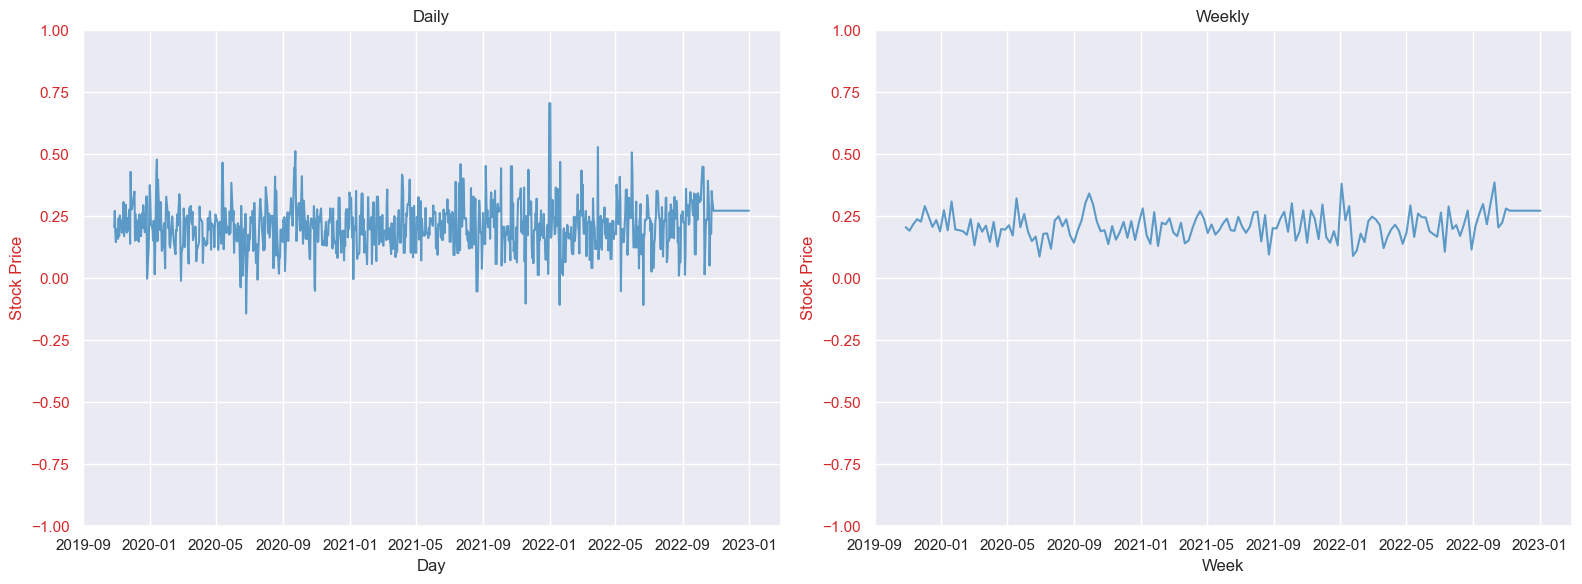

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = twr_sent_results

# convert created_at to datetime and extract day only
df1['day'] = pd.to_datetime(df1['created_at']).dt.date

# group by day and calculate mean compound score
df1_daily = df1.groupby('day')['compound'].mean().reset_index()

# create a daily range of dates
date_range = pd.date_range(start='2020-11-10', end='2022-12-31', freq='D').date

# merge with date range to fill in missing days
df1_daily = pd.merge(df1_daily, pd.DataFrame({'day': date_range}), on='day', how='outer')

# sort by day
df1_daily = df1_daily.sort_values(by='day')

# fill missing compound values
df1_daily['compound'] = df1_daily['compound'].fillna(method='ffill').fillna(method='bfill').interpolate()

# calculate weekly compound score
df1_weekly = df1_daily.set_index('day')
df1_weekly.index = pd.to_datetime(df1_weekly.index)
df1_weekly = df1_weekly.resample('W-MON').mean().reset_index()

# read in second dataframe
df2 = pd.read_csv('/Users/namirsacic/tokenized-assets/data_analysis/processed_data/daily_merged_data/TWTR_daily_merged.csv')

# convert day to datetime
df2['day'] = pd.to_datetime(df2['day']).dt.date

# merge dataframes on day
df = pd.merge(df2, df1_daily, on='day', how='left')

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# plot daily compound score and stock price
color = 'tab:blue'
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Compound Score', color=color)
axs[0].plot(df1_daily['day'], df1_daily['compound'], color=color, alpha=0.7)
axs[0].tick_params(axis='y', labelcolor=color)

color = 'tab:red'
axs[0].set_ylabel('Stock Price', color=color)
axs[0].plot(df['day'], df['price'], color=color, alpha=0.7)
axs[0].tick_params(axis='y', labelcolor=color)

axs[0].set_ylim([-1, 1])
axs[0].set_title('Daily')

# plot weekly compound score and stock price
color = 'tab:blue'
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Compound Score', color=color)
axs[1].plot(df1_weekly['day'], df1_weekly['compound'], color=color, alpha=0.7)
axs[1].tick_params(axis='y', labelcolor=color)

color = 'tab:red'
axs[1].set_ylabel('Stock Price', color=color)
axs[1].plot(df2['day'], df2['price'], color=color, alpha=0.7)
axs[1].tick_params(axis='y', labelcolor=color)

axs[1].set_ylim([-1, 1])
axs[1].set_title('Weekly')

fig.tight_layout()
plt.show()


In [28]:
color = 'tab:red'
axs[1].set_ylabel('Stock Price', color=color)
axs[1].plot(df2['day'], df2['price'], color=color, alpha=0.7)
axs[1].tick_params(axis='y', labelcolor=color)

ymin, ymax = df2['price'].min(), df2['price'].max()
axs[1].set_ylim([ymin - 1, ymax + 1])

axs[1].set_title('Weekly')


Text(0.5, 1.0, 'Weekly')

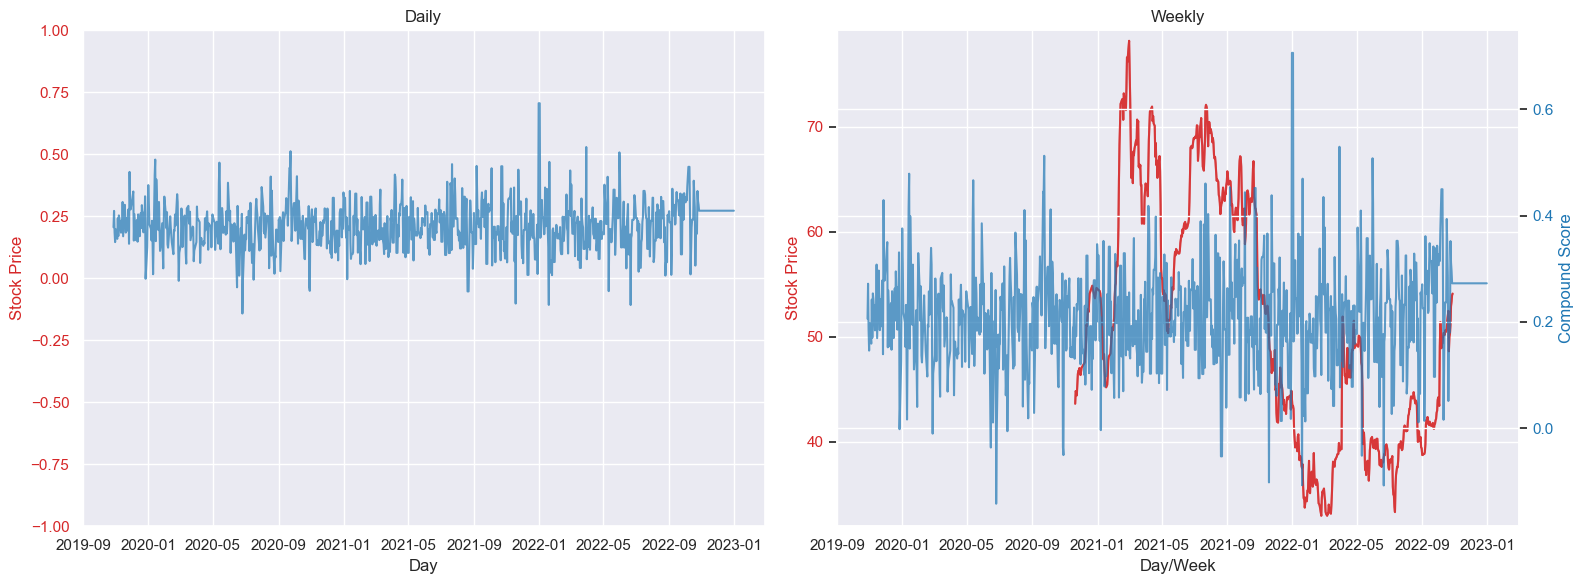

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = twr_sent_results

# convert created_at to datetime and extract day only
df1['day'] = pd.to_datetime(df1['created_at']).dt.date

# group by day and calculate mean compound score
df1_daily = df1.groupby('day')['compound'].mean().reset_index()

# create a daily range of dates
date_range = pd.date_range(start='2020-11-10', end='2022-12-31', freq='D').date

# merge with date range to fill in missing days
df1_daily = pd.merge(df1_daily, pd.DataFrame({'day': date_range}), on='day', how='outer')

# sort by day
df1_daily = df1_daily.sort_values(by='day')

# fill missing compound values
df1_daily['compound'] = df1_daily['compound'].fillna(method='ffill').fillna(method='bfill').interpolate()

# calculate weekly compound score
df1_weekly = df1_daily.set_index('day')
df1_weekly.index = pd.to_datetime(df1_weekly.index)
df1_weekly = df1_weekly.resample('W-MON').mean().reset_index()

# read in second dataframe
df2 = pd.read_csv('/Users/namirsacic/tokenized-assets/data_analysis/processed_data/daily_merged_data/TWTR_daily_merged.csv')

# convert day to datetime
df2['day'] = pd.to_datetime(df2['day']).dt.date

# merge dataframes on day
df = pd.merge(df2, df1_daily, on='day', how='left')

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# plot daily compound score and stock price
color = 'tab:blue'
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Compound Score', color=color)
axs[0].plot(df1_daily['day'], df1_daily['compound'], color=color, alpha=0.7)
axs[0].tick_params(axis='y', labelcolor=color)

color = 'tab:red'
axs[0].set_ylabel('Stock Price', color=color)
axs[0].plot(df['day'], df['price'], color=color, alpha=0.7)
axs[0].tick_params(axis='y', labelcolor=color)

axs[0].set_ylim([-1, 1])
axs[0].set_title('Daily')

# plot weekly compound score and stock price
color = 'tab:red'
axs[1].set_xlabel('Day/Week')
axs[1].set_ylabel('Stock Price', color=color)
axs[1].plot(df['day'], df['price'], color=color, alpha=0.7)
axs[1].tick_params(axis='y', labelcolor=color)

# plot daily compound score
color = 'tab:blue'
axs2 = axs[1].twinx()
axs2.set_ylabel('Compound Score', color=color)
axs2.plot(df1_daily['day'], df1_daily['compound'], color=color, alpha=0.7)
axs2.tick_params(axis='y', labelcolor=color)

# plot weekly compound score
axs[1].plot(df1_weekly['day'], df1_weekly['compound'], color=color, alpha=0.7)

# plot weekly stock price
axs[1].plot(df2['day'], df2['price'], color='tab:red', alpha=0.7)

# set y-axis limits for weekly plot
ymin, ymax = df2['price'].min(), df2['price'].max()
axs[1].set_ylim([ymin - 1, ymax + 1])

# set title for weekly plot
axs[1].set_title('Weekly')

# set tight layout for both plots
fig.tight_layout()

# show the plots
plt.show()


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = twr_sent_results

# convert created_at to datetime and extract day only
df1['day'] = pd.to_datetime(df1['created_at']).dt.date

# group by day and calculate mean compound score
df1_daily = df1.groupby('day')['compound'].mean().reset_index()

# create a daily range of dates
date_range = pd.date_range(start='2020-11-10', end='2022-12-31', freq='D').date

# merge with date range to fill in missing days
df1_daily = pd.merge(df1_daily, pd.DataFrame({'day': date_range}), on='day', how='outer')

# sort by day
df1_daily = df1_daily.sort_values(by='day')

# fill missing compound values
df1_daily['compound'] = df1_daily['compound'].fillna(method='ffill').fillna(method='bfill').interpolate()

# calculate weekly compound score
df1_weekly = df1_daily.set_index('day')
df1_weekly.index = pd.to_datetime(df1_weekly.index)
df1_weekly = df1_weekly.resample('W-MON').mean().reset_index()

# read in second dataframe
df2 = pd.read_csv('/Users/namirsacic/tokenized-assets/data_analysis/processed_data/daily_merged_data/TWTR_daily_merged.csv')

# convert day to datetime
df2['day'] = pd.to_datetime(df2['day']).dt.date

# merge dataframes on day
df = pd.merge(df2, df1_daily, on='day', how='left')

In [42]:
df

,day,price,size,premium,premium*size,price*size,average,adjusted_size,weighted_price,weighted_average_premium,count,WAP_buy,WAP_sell,compound
0,2020-11-20,43.607500,0.85,-0.015521,-0.003068,3.710725e+01,44.295000,0.25,43.655588,-0.003609,4,43.604091,43.750000,0.173009
1,2020-11-21,44.816667,3.40,0.011777,0.012891,1.523160e+02,44.295000,3.40,44.798824,0.003791,3,44.798824,NaN,0.173009
2,2020-11-23,44.400000,0.30,0.002370,0.000356,1.332000e+01,44.295000,-0.30,44.400000,0.001185,2,NaN,44.400000,0.233707
3,2020-11-24,45.356154,220.60,0.004976,0.031835,1.000423e+04,45.132371,-220.40,45.350109,0.000144,39,45.590000,45.350000,0.221886
4,2020-11-25,46.436667,10.05,-0.001761,-0.000874,4.665747e+02,46.519046,9.95,46.425348,-0.000087,6,46.425000,46.495000,0.232340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2022-10-24,51.161042,717.40,-0.000772,0.049250,3.688326e+04,51.199651,148.70,51.412402,0.000069,24,51.495307,51.286143,0.351940
646,2022-10-25,52.914700,7415.70,0.001172,0.663010,3.942032e+05,52.852545,-110.10,53.157926,0.000089,50,53.162384,53.153599,0.311661
647,2022-10-26,53.349351,4349.05,-0.000002,-0.010017,2.328521e+05,53.349664,3116.65,53.540915,-0.000002,77,53.514096,53.703381,0.295968
648,2022-10-27,53.953389,26307.95,0.000645,0.065541,1.419929e+06,53.918663,5776.85,53.973374,0.000002,391,53.998575,53.933991,0.272541


In [43]:
df.describe()

,price,size,premium,premium*size,price*size,average,adjusted_size,weighted_price,weighted_average_premium,count,WAP_buy,WAP_sell,compound
count,650.000000,650.000000,650.000000,650.000000,6.500000e+02,650.000000,650.000000,650.000000,650.000000,650.000000,603.000000,583.000000,650.000000
mean,50.995844,1268.939385,0.002067,0.034091,5.916507e+04,50.908518,3.538615,50.952980,0.000511,33.098462,50.784294,50.436653,0.211495
std,11.816231,5758.454057,0.013981,0.529398,2.798224e+05,11.841418,2791.182095,11.798846,0.007008,98.232152,11.818167,11.735047,0.102381
min,32.932632,0.050000,-0.125070,-5.525429,1.856750e+00,32.700000,-18765.650000,31.837056,-0.035858,1.000000,32.807091,31.492050,-0.107730
25%,40.128125,5.200000,-0.001585,-0.004575,2.505601e+02,39.980285,-23.137500,40.065169,-0.000124,4.000000,39.928621,40.001046,0.150750
50%,48.980052,38.425000,0.001533,0.002706,1.950408e+03,49.002084,0.000000,48.955680,0.000046,9.000000,48.817286,48.216418,0.208339
75%,62.275759,371.975000,0.005724,0.024350,1.840515e+04,62.353199,12.787500,62.281778,0.000560,26.000000,62.320016,61.623970,0.267400
max,78.185000,91192.800000,0.081746,7.118283,4.641139e+06,79.170000,50015.450000,78.379215,0.081746,1644.000000,80.000000,78.399459,0.706003


NameError: name 'mdates' is not defined

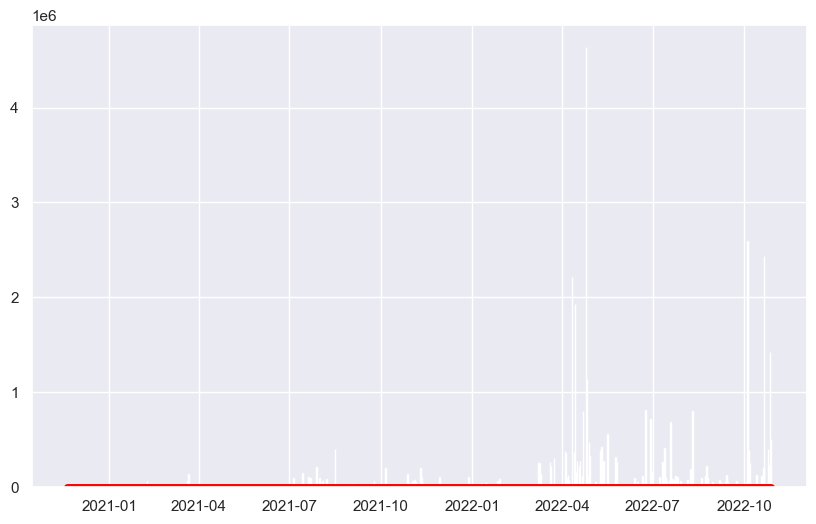

In [44]:
# set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# plot the bars for price*size and compound
ax.bar(df['day'], df['price*size'], color='blue', alpha=1, label='Price*Size')
ax.plot(df['day'], df['compound'], color='red', linewidth=5, label='Compound')

# set the x-axis labels to show only the year and month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# set the y-axis label and title
ax.set_ylabel('Price*Size')
ax.set_title('Comparison of Price*Size and Compound')

# add a legend
ax.legend()

# add grid lines
ax.grid(True, which='major', linestyle='--')

# add horizontal line at 0 for reference
ax.axhline(0, color='black', linewidth=0.5)

# show the plot
plt.show()

In [54]:
create_csv(df, "twr_ftx_sent.csv")